In [27]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [19]:
t_c = torch.tensor(t_c) # temperature in celcius
t_u = torch.tensor(t_u) # temperature in unknown unit

In [20]:
def model(t_u,params):
    return (t_u*params[0]+params[1])

In [21]:
def loss_fn(y_p, y):
    mse = (y_p-y)**2
    return torch.mean(mse)

In [22]:
def train(epoch,t_un,t_cn,params,lr=0.01):
    for i in range(epoch):
        t_pn = model(t_un,params)
        loss = loss_fn(t_pn,t_cn)
        if(params.grad is not None):
            params.grad.zero_()
        loss.backward()
        with torch.no_grad():
            params -= lr*params.grad
        if(i%500 ==0):
            print("Epoch = {}. Loss = {}".format(i,loss))       

In [23]:
t_un = 0.1*t_u
t_cn = 0.1*t_c
params = torch.tensor([1.0,0.0], requires_grad=True)

In [24]:
train(4000,t_un,t_c,params,lr=0.01)

Epoch = 0. Loss = 80.36434173583984
Epoch = 500. Loss = 7.843369960784912
Epoch = 1000. Loss = 3.825483560562134
Epoch = 1500. Loss = 3.091630697250366
Epoch = 2000. Loss = 2.9575958251953125
Epoch = 2500. Loss = 2.9331159591674805
Epoch = 3000. Loss = 2.9286458492279053
Epoch = 3500. Loss = 2.9278295040130615


In [26]:
params

tensor([  5.3643, -17.2853], requires_grad=True)

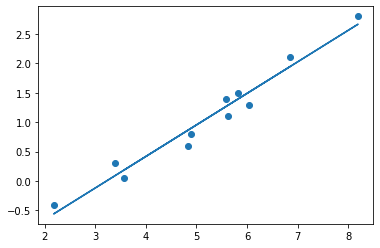

In [25]:
with torch.no_grad():
    plt.scatter(0.1*t_u,0.1*t_c)
    t_pr = model(0.1*t_u,params)
    plt.plot(0.1*t_u,0.1*t_pr)
    plt.show()

# With optimizer

In [29]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [104]:
def train(epoch,t_u, t_c, optimizer, params):
    for i in range(epoch+1):
        t_p = model(t_u, params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(i%500 == 0):
            print("Epoch: {}. Loss: {}".format(i,loss))

In [94]:
params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_un = 0.1*t_u

In [95]:
train(5000, t_u = t_un, t_c = t_c,optimizer=optimizer, params = params )

Epoch: 0. Loss: 80.36434173583984
Epoch: 500. Loss: 7.843371391296387
Epoch: 1000. Loss: 3.825483560562134
Epoch: 1500. Loss: 3.091630697250366
Epoch: 2000. Loss: 2.9575958251953125
Epoch: 2500. Loss: 2.9331159591674805
Epoch: 3000. Loss: 2.9286458492279053
Epoch: 3500. Loss: 2.9278295040130615
Epoch: 4000. Loss: 2.927680015563965
Epoch: 4500. Loss: 2.92765212059021


In [105]:
params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-1
adma_optimizer = optim.Adam([params], lr=learning_rate)

In [106]:
train(2000, t_u = t_u, t_c = t_c,optimizer=adma_optimizer, params = params )

Epoch: 0. Loss: 1763.8846435546875
Epoch: 500. Loss: 7.588878154754639
Epoch: 1000. Loss: 3.085362195968628
Epoch: 1500. Loss: 2.9285659790039062
Epoch: 2000. Loss: 2.9276459217071533


In [107]:
1e-1

0.1

In [155]:
samples = t_u.shape[0]
val_samples = int(0.2*samples)
shuffeled_indices = torch.randperm(samples)
train_indices = shuffeled_indices[:-val_samples]
val_indices = shuffeled_indices[-val_samples:]

In [156]:
train_indices.shape, val_indices.shape

(torch.Size([9]), torch.Size([2]))

In [157]:
train_indices, val_indices

(tensor([ 6,  3,  1,  4, 10,  9,  2,  0,  7]), tensor([5, 8]))

In [158]:
train_t_u = t_u[train_indices]
val_t_u = t_u[val_indices]

train_t_c = t_c[train_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1*train_t_u
val_t_un = 0.1*val_t_u

In [173]:
def train(epoch, train_t_u, val_t_u, train_t_c, val_t_c, optimizer, params):
    for i in range(epoch+1):
        train_t_p = model(train_t_u, params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u,params).detach()
        val_loss = loss_fn(val_t_p,val_t_c).detach()
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if(i%500 == 0):
            print("Epoch: {}. Training Loss: {}. Validation Loss: {}.".format(i,train_loss,val_loss))

In [174]:
params = torch.tensor([1.0,0.0],requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [175]:
train(epoch = 5000,
              optimizer = optimizer,
              params = params,
              train_t_u = train_t_un,
              val_t_u = val_t_un,
              train_t_c = train_t_c,
              val_t_c = val_t_c)

Epoch: 0. Training Loss: 96.99889373779297. Validation Loss: 5.508849143981934.
Epoch: 500. Training Loss: 6.522721290588379. Validation Loss: 11.466014862060547.
Epoch: 1000. Training Loss: 3.0689449310302734. Validation Loss: 7.612099647521973.
Epoch: 1500. Training Loss: 2.5911972522735596. Validation Loss: 6.3945488929748535.
Epoch: 2000. Training Loss: 2.5251121520996094. Validation Loss: 5.97157096862793.
Epoch: 2500. Training Loss: 2.5159685611724854. Validation Loss: 5.818385124206543.
Epoch: 3000. Training Loss: 2.514705181121826. Validation Loss: 5.761990070343018.
Epoch: 3500. Training Loss: 2.514530658721924. Validation Loss: 5.741097450256348.
Epoch: 4000. Training Loss: 2.5145058631896973. Validation Loss: 5.73332405090332.
Epoch: 4500. Training Loss: 2.5145018100738525. Validation Loss: 5.730440139770508.
Epoch: 5000. Training Loss: 2.514502763748169. Validation Loss: 5.7294087409973145.
